In [1]:
# 模型误差=偏差(Bias)+方差(Variance)+不可避免的误差

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
np.random.seed(666)
x=np.random.uniform(-3.0,3.0,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+x+2+np.random.normal(0,1,100)

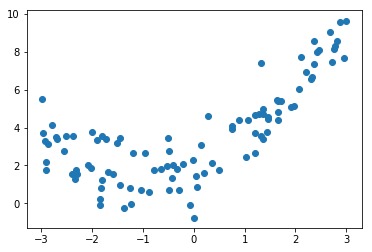

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
# 未正则化的多项式回归
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
    ])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [9]:
from sklearn.metrics import mean_squared_error
ploy_reg=PolynomialRegression(degree=30)
ploy_reg.fit(X_train,y_train)
y_poly_predict=ploy_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

48.205650462345794

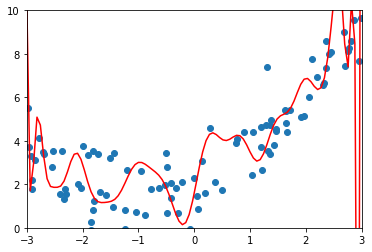

In [10]:
def plot_model(model):
    x_plot=np.linspace(-3,3,100).reshape(100,1)
    y_plot=model.predict(x_plot)
    plt.scatter(x,y)
    plt.plot(x_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.show()
plot_model(ploy_reg)

In [11]:
# 使用岭回归正则化
from sklearn.linear_model import Ridge
def RidgeRegression(degree,alpha):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",Ridge(alpha=alpha))
    ])

In [12]:
ridgel_reg=RidgeRegression(30,0.0001)
ridgel_reg.fit(X_train,y_train)

y1_predict=ridgel_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.7724779084830755

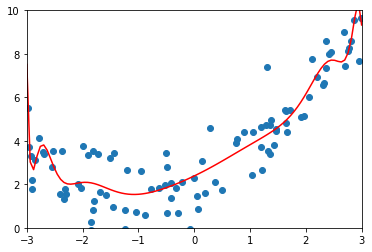

In [13]:
plot_model(ridgel_reg)

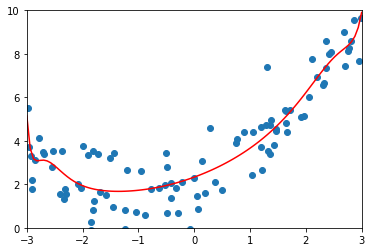

In [14]:
ridge2_reg=RidgeRegression(30,0.1)
ridge2_reg.fit(X_train,y_train)

y1_predict=ridge2_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)
plot_model(ridge2_reg)

In [15]:
### LASSO回归进行正则化
from sklearn.linear_model import Lasso
def LassoRegression(degree,alpha):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",Ridge(alpha=alpha))
    ])

In [23]:
lasso1_reg=LassoRegression(20,0.001)
lasso1_reg.fit(X_train,y_train)
y1_predict=lasso1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.604009939654362

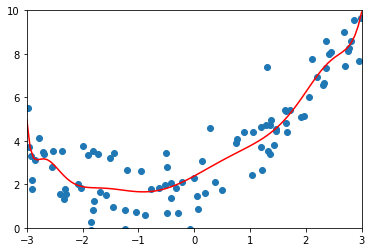

In [24]:
plot_model(lasso1_reg)

In [25]:
lasso2_reg=LassoRegression(20,1)
lasso2_reg.fit(X_train,y_train)
y1_predict=lasso2_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.6030704855300169

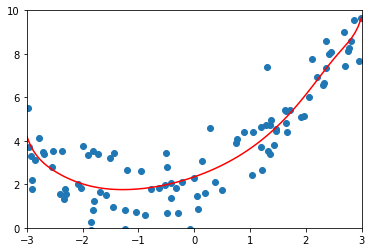

In [26]:
plot_model(lasso2_reg)